In [1]:
!pip install yfinance statsmodels --quiet

# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

# Optional: Configure default plot style
plt.style.use('seaborn-v0_8')
sns.set_theme()

print("✅ All basic libraries imported successfully.")


✅ All basic libraries imported successfully.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving INFY.NS.csv to INFY.NS (1).csv


In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("/content/INFY.NS (1).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6496,2021-10-12,1677.000000,1689.000000,1662.000000,1685.150024,1685.150024,7439300.0
6497,2021-10-13,1695.949951,1713.650024,1680.050049,1709.199951,1709.199951,7104171.0
6498,2021-10-14,1754.000000,1783.599976,1698.199951,1715.750000,1715.750000,19655776.0
6499,2021-10-18,1740.000000,1799.000000,1740.000000,1792.150024,1792.150024,13438109.0
6500,2021-10-19,1814.000000,1834.500000,1782.300049,1822.150024,1822.150024,10324260.0


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6.487000e+03
mean,315.959501,319.722653,312.134399,315.928990,275.373725,1.529716e+07
std,317.395127,320.568211,314.366051,317.494593,311.783465,1.616161e+07
min,0.763183,0.765625,0.712890,0.763183,0.526380,0.000000e+00
25%,69.492970,70.921875,68.063671,69.482033,49.189633,6.036795e+06
50%,237.500000,241.587494,233.206253,238.268753,179.381546,9.594120e+06
75%,473.500000,479.237503,470.049988,474.728119,414.672867,1.821839e+07
max,1814.000000,1834.500000,1782.300049,1822.150024,1822.150024,2.766150e+08


In [8]:
df.isnull().sum()

,0
Date,0
Open,14
High,14
Low,14
Close,14
Adj Close,14
Volume,14


In [9]:
df = df.fillna(method='ffill')

In [10]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
df.columns = df.columns.str.strip()
print("Index type:", type(df.index)) # Check index type
print("Index name:", df.index.name)  # # Check index name
print("First 5 index values:\n", df.index[:5])

Index type: <class 'pandas.core.indexes.range.RangeIndex'>
Index name: None
First 5 index values:
 RangeIndex(start=0, stop=5, step=1)


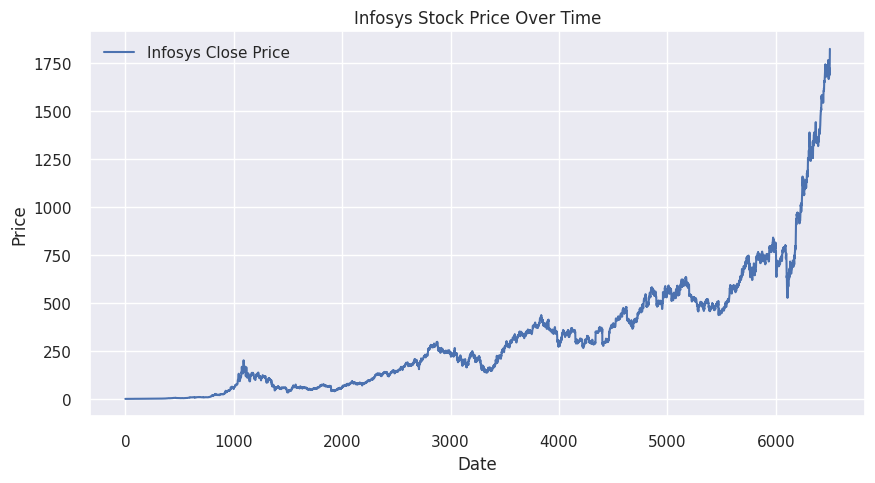

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Infosys Close Price')
plt.title("Infosys Stock Price Over Time")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(df['Close'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("The series is stationary ")
else:
    print("The series is non-stationary ")

ADF Statistic: 5.583417255233414
p-value: 1.0
Critical Values: {'1%': np.float64(-3.431361268624988), '5%': np.float64(-2.86198689371818), '10%': np.float64(-2.5670078782230275)}
The series is non-stationary 


In [16]:
df_diff = df['Close'].diff().dropna()

In [17]:
from statsmodels.tsa.stattools import adfuller
result_diff = adfuller(df_diff)

print('ADF Statistic (diff):', result_diff[0])
print('p-value (diff):', result_diff[1])
if result_diff[1] <= 0.05:
    print("The differenced series is stationary ")
else:
    print("The differenced series is still non-stationary ")

ADF Statistic (diff): -15.173140725497841
p-value (diff): 6.349171941772084e-28
The differenced series is stationary 


In [18]:
from statsmodels.tsa.arima.model import ARIMA


arima_model = ARIMA(df['Close'], order=(5,1,0))
arima_result = arima_model.fit() # fitting arima model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6501
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -22336.226
Date:                Sat, 16 Aug 2025   AIC                          44684.453
Time:                        14:14:52   BIC                          44725.130
Sample:                             0   HQIC                         44698.522
                               - 6501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0080      0.005      1.515      0.130      -0.002       0.018
ar.L2         -0.0214      0.006     -3.702      0.000      -0.033      -0.010
ar.L3          0.0077      0.007      1.040      0.2

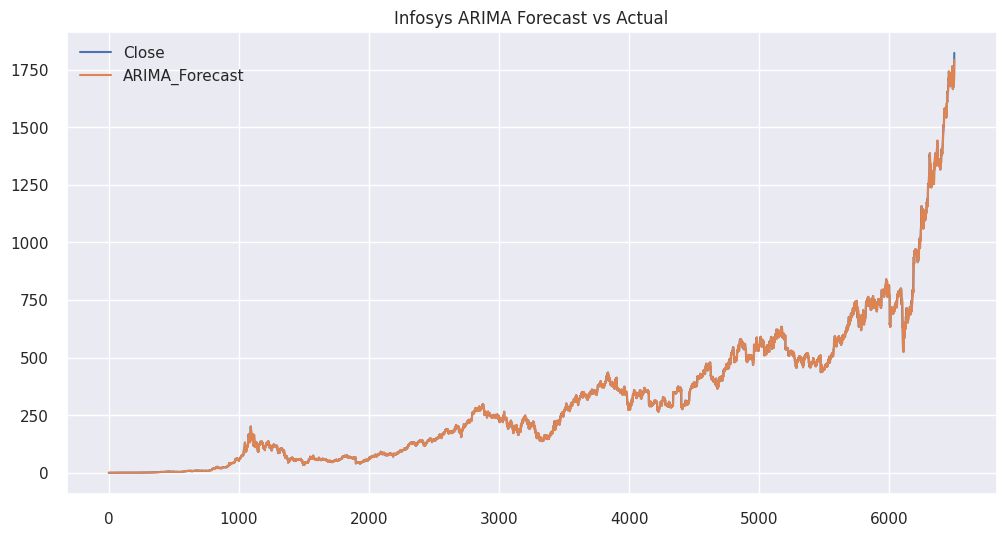

In [19]:
df['ARIMA_Forecast'] = arima_result.predict(start=0, end=len(df)-1, typ='levels')
df[['Close','ARIMA_Forecast']].plot(figsize=(12,6), title="Infosys ARIMA Forecast vs Actual")
plt.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [21]:
sarima_model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit() # here we use p,d,q,s, where s = 12 "months"
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 6501
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -22322.574
Date:                            Sat, 16 Aug 2025   AIC                          44655.148
Time:                                    14:16:29   BIC                          44689.037
Sample:                                         0   HQIC                         44666.870
                                           - 6501                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9100      0.019    -47.822      0.000      -0.947      -0.873
ma.L1          0.9318      0.017   

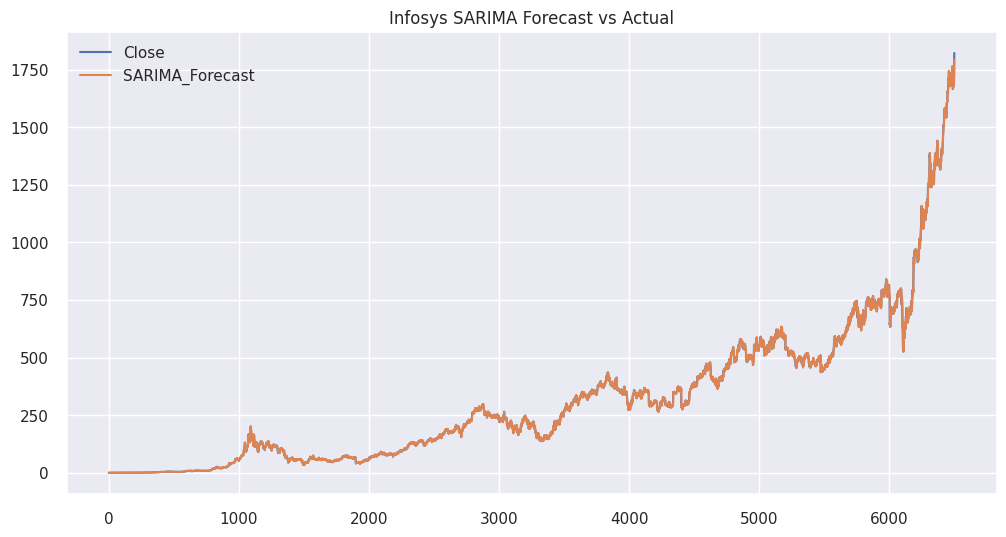

In [22]:
df['SARIMA_Forecast'] = sarima_result.predict(start=0, end=len(df)-1)
df[['Close','SARIMA_Forecast']].plot(figsize=(12,6), title="Infosys SARIMA Forecast vs Actual")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

rmse_arima = np.sqrt(mean_squared_error(df['Close'], df['ARIMA_Forecast']))
rmse_sarima = np.sqrt(mean_squared_error(df['Close'], df['SARIMA_Forecast']))

print("RMSE ARIMA:", rmse_arima)
print("RMSE SARIMA:", rmse_sarima)

RMSE ARIMA: 7.518206309206274
RMSE SARIMA: 7.514755116783879


In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

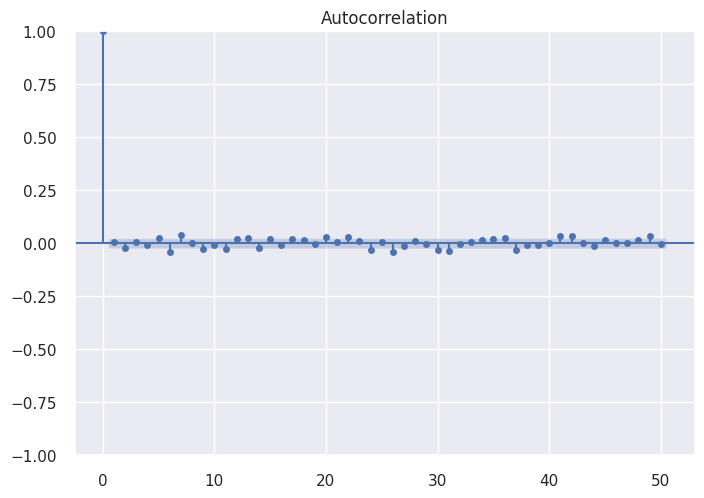

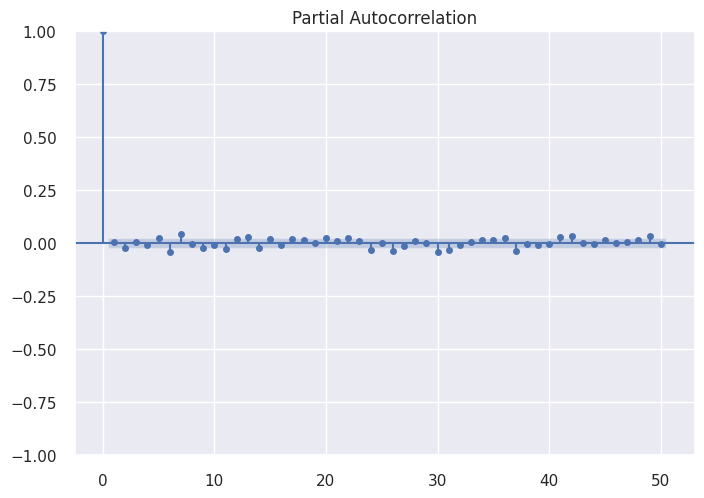

In [25]:
f_diff = df['Close'].diff().dropna()

plot_acf(df_diff, lags=50)
plot_pacf(df_diff, lags=50)
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

best_aic = float("inf")
best_order = None

for p in range(0,6):
    for q in range(0,6):
        try:
            model = ARIMA(df['Close'], order=(p,1,q))
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = (p,1,q)
        except:
            continue

print("Best ARIMA order:", best_order, "with AIC:", best_aic)

Best ARIMA order: (2, 1, 5) with AIC: 44649.894588474905


In [27]:
from statsmodels.tsa.arima.model import ARIMA

best_order = (2, 1, 5)
arima_model = ARIMA(df['Close'], order=best_order)
arima_result = arima_model.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6501
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -22316.947
Date:                Sat, 16 Aug 2025   AIC                          44649.895
Time:                        14:24:28   BIC                          44704.131
Sample:                             0   HQIC                         44668.653
                               - 6501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4516      0.019    -74.944      0.000      -1.490      -1.414
ar.L2         -0.8824      0.017    -50.797      0.000      -0.916      -0.848
ma.L1          1.4649      0.019     75.459      0.0

In [28]:
df['ARIMA_Forecast_Optimized'] = arima_result.predict(start=0, end=len(df)-1, typ='levels')

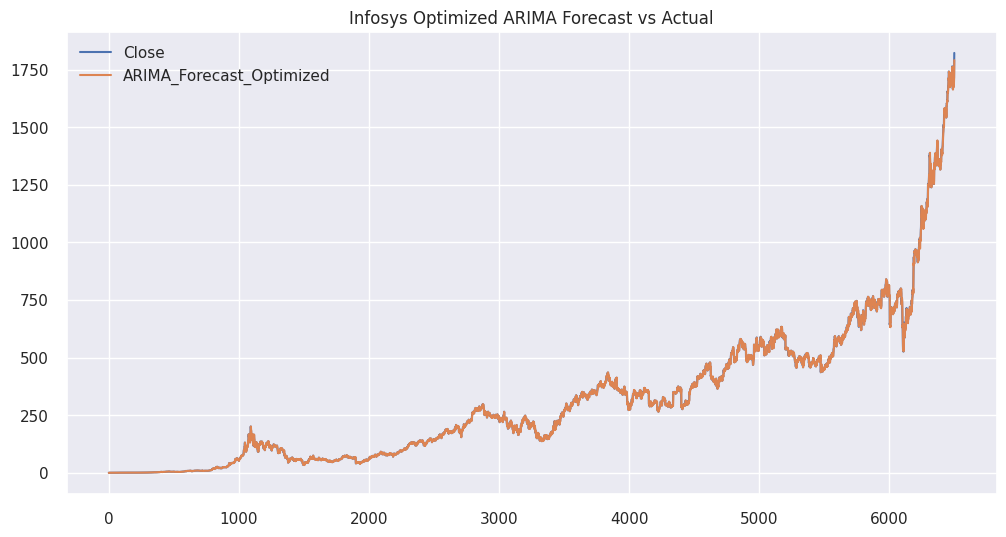

In [29]:
df[['Close', 'ARIMA_Forecast_Optimized']].plot(figsize=(12,6), title="Infosys Optimized ARIMA Forecast vs Actual")
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error


In [31]:
rmse_optimized = np.sqrt(mean_squared_error(df['Close'], df['ARIMA_Forecast_Optimized']))
print("RMSE Optimized ARIMA:", rmse_optimized)

RMSE Optimized ARIMA: 7.495900359467929


In [32]:
df['Close_log'] = np.log(df['Close'])

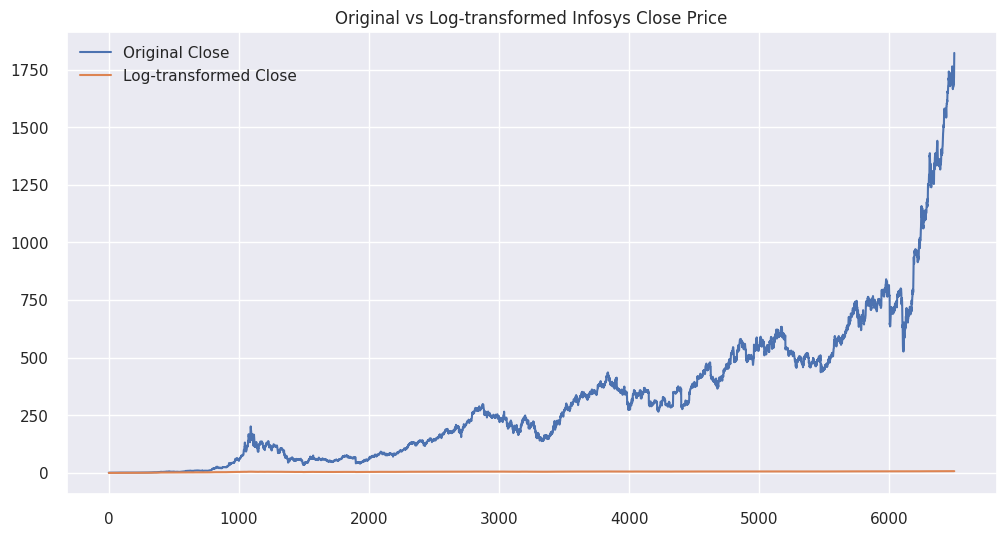

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Original Close')
plt.plot(df['Close_log'], label='Log-transformed Close')
plt.title("Original vs Log-transformed Infosys Close Price")
plt.legend()
plt.show()

In [34]:
best_order = (2, 1, 5)  # your previously optimized order
arima_log_model = ARIMA(df['Close_log'], order=best_order)# fitting arima model on log transformed model
arima_log_result = arima_log_model.fit()
print(arima_log_result.summary())

                               SARIMAX Results                                
Dep. Variable:              Close_log   No. Observations:                 6501
Model:                 ARIMA(2, 1, 5)   Log Likelihood               14847.791
Date:                Sat, 16 Aug 2025   AIC                         -29679.582
Time:                        14:26:41   BIC                         -29625.345
Sample:                             0   HQIC                        -29660.823
                               - 6501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4648      2.263      0.205      0.837      -3.971       4.901
ar.L2          0.1324      1.682      0.079      0.937      -3.165       3.429
ma.L1         -0.3979      2.264     -0.176      0.8

In [36]:
df['ARIMA_Log_Forecast'] = arima_log_result.predict(start=0, end=len(df)-1, typ='levels')
df['ARIMA_Log_Forecast_Original'] = np.exp(df['ARIMA_Log_Forecast'])

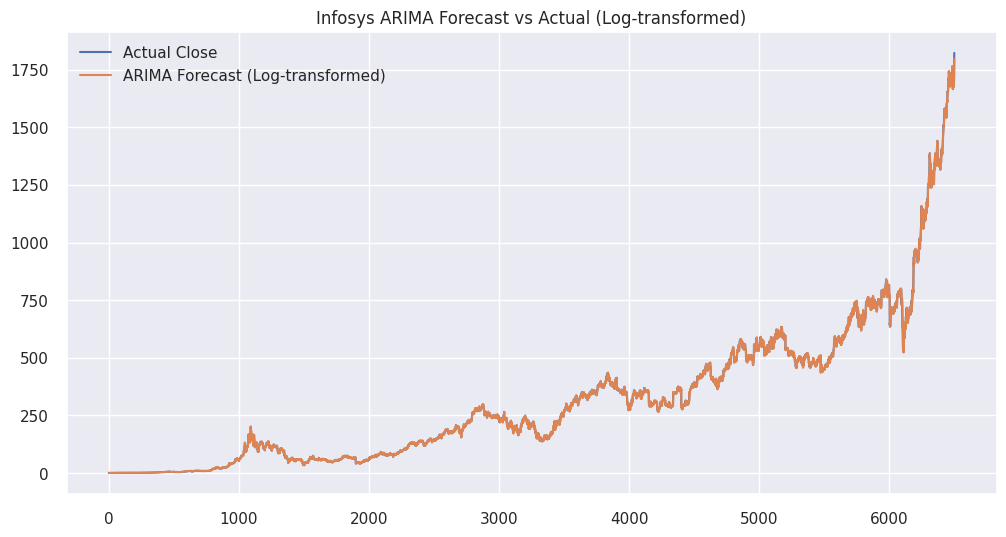

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual Close')
plt.plot(df['ARIMA_Log_Forecast_Original'], label='ARIMA Forecast (Log-transformed)')
plt.title("Infosys ARIMA Forecast vs Actual (Log-transformed)")
plt.legend()
plt.show()

In [38]:
rmse_log = np.sqrt(mean_squared_error(df['Close'], df['ARIMA_Log_Forecast_Original']))
print("RMSE ARIMA Log-transformed:", rmse_log)

RMSE ARIMA Log-transformed: 7.537572783093103


In [39]:
best_aic = float("inf")
best_order = None

# p: 0-5, d:1 (already), q: 0-6
for p in range(0,8):
    for q in range(0,9):
        try:
            model = ARIMA(df['Close'], order=(p,1,q))
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = (p,1,q)
        except:
            continue

print("Best ARIMA order:", best_order, "with AIC:", best_aic)

Best ARIMA order: (7, 1, 4) with AIC: 44609.991144314496


In [40]:
best_order = (7,1,4)
arima_model = ARIMA(df['Close'], order=best_order)
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6501
Model:                 ARIMA(7, 1, 4)   Log Likelihood              -22292.996
Date:                Sat, 16 Aug 2025   AIC                          44609.991
Time:                        14:40:26   BIC                          44691.346
Sample:                             0   HQIC                         44638.129
                               - 6501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1956      0.027     -7.313      0.000      -0.248      -0.143
ar.L2         -0.1153      0.021     -5.623      0.000      -0.155      -0.075
ar.L3         -0.3654      0.020    -18.683      0.0

In [41]:
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

print("Training data length:", len(train))
print("Testing data length:", len(test))

Training data length: 5200
Testing data length: 1301


In [42]:
best_order = (7,1,4)

arima_model = ARIMA(train, order=best_order)
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5200
Model:                 ARIMA(7, 1, 4)   Log Likelihood              -15526.719
Date:                Sat, 16 Aug 2025   AIC                          31077.437
Time:                        15:09:44   BIC                          31156.112
Sample:                             0   HQIC                         31104.957
                               - 5200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3125      0.093      3.343      0.001       0.129       0.496
ar.L2          0.4753      0.065      7.337      0.000       0.348       0.602
ar.L3          0.4582      0.051      8.992      0.0

In [43]:
arima_510 = ARIMA(train, order=(5,1,0))
arima_510_result = arima_510.fit()
print("ARIMA(5,1,0) Summary:")
print(arima_510_result.summary())

ARIMA(5,1,0) Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5200
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -15534.528
Date:                Sat, 16 Aug 2025   AIC                          31081.056
Time:                        15:09:54   BIC                          31120.394
Sample:                             0   HQIC                         31094.816
                               - 5200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0237      0.009      2.692      0.007       0.006       0.041
ar.L2         -0.0388      0.010     -4.024      0.000      -0.058      -0.020
ar.L3         -0.0217      0.0

In [44]:
forecast_510 = arima_510_result.predict(start=len(train), end=len(df)-1, typ='levels')

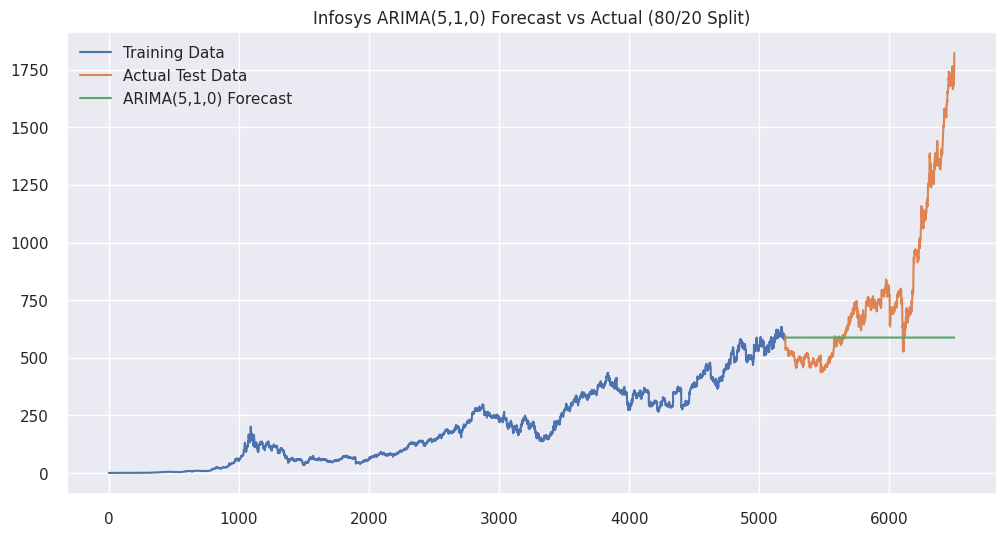

In [45]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast_510, label='ARIMA(5,1,0) Forecast')
plt.title("Infosys ARIMA(5,1,0) Forecast vs Actual (80/20 Split)")
plt.legend()
plt.show()

In [62]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=train, mode='lines', name='Training Data'))
fig.add_trace(go.Scatter(y=test, mode='lines', name='Actual Test Data'))
fig.add_trace(go.Scatter(y=forecast_510, mode='lines', name='Forecast', line=dict(color='orange')))
fig.update_layout(title="Interactive ARIMA Forecast", xaxis_title="Time", yaxis_title="Close Price")
fig.show()

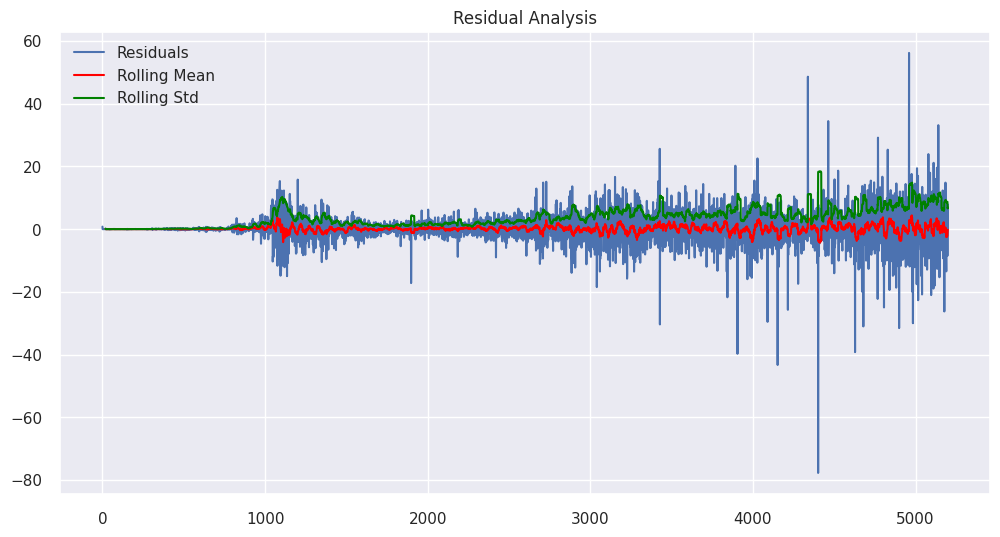

In [46]:
residuals = arima_510_result.resid
rolling_mean = residuals.rolling(20).mean()
rolling_std = residuals.rolling(20).std()

plt.figure(figsize=(12,6))
plt.plot(residuals, label='Residuals')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title("Residual Analysis")
plt.legend()
plt.show()

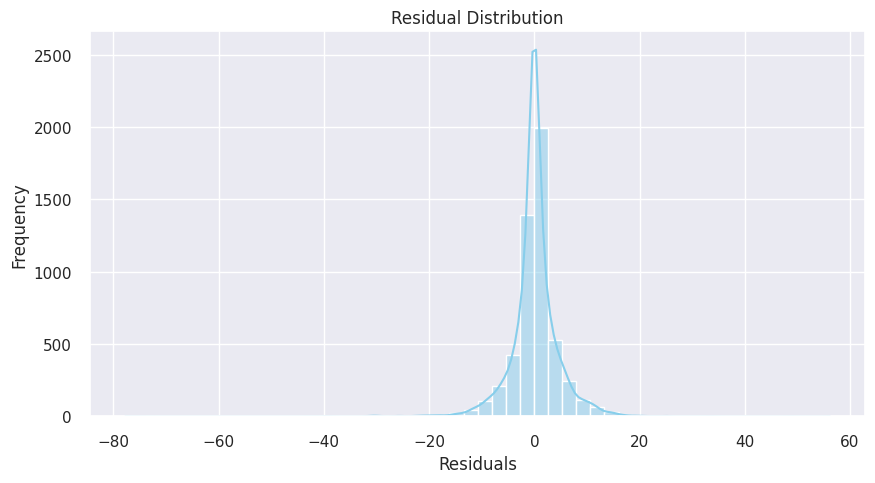

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, bins=50, color='skyblue')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

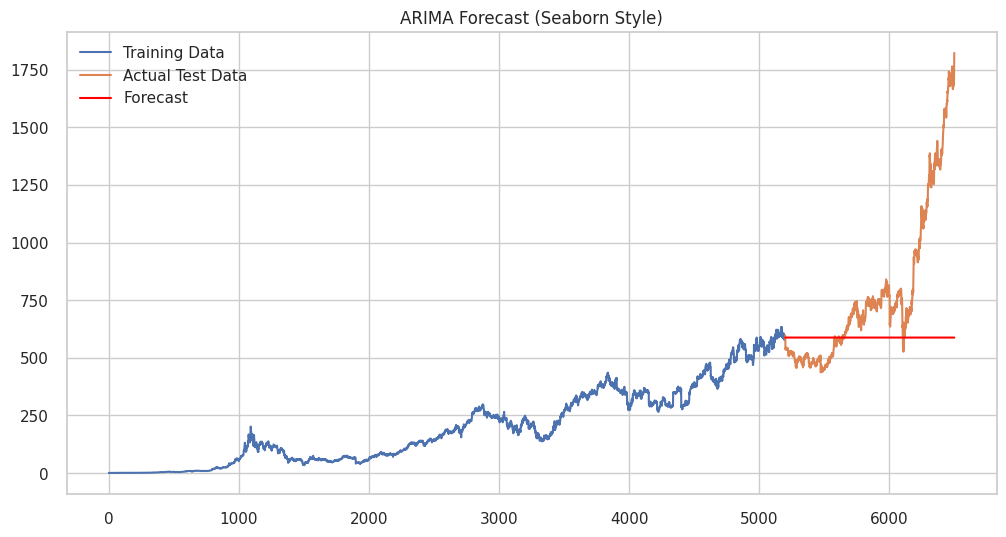

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast_510, label='Forecast', color='red')
plt.title("ARIMA Forecast (Seaborn Style)")
plt.legend()
plt.show()

In [49]:
rmse_test = np.sqrt(mean_squared_error(test, forecast_510))
print("RMSE on Test Data (ARIMA 5,1,0):", rmse_test)

RMSE on Test Data (ARIMA 5,1,0): 393.30457701136385


In [50]:
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

print("Training length:", len(train))
print("Testing length:", len(test))

Training length: 5200
Testing length: 1301


In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
order = (4,1,0)
seasonal_order = (1,1,1,5)

In [53]:
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                       enforce_stationarity=False, enforce_invertibility=False)
sarima_result = sarima_model.fit()
print(sarima_result.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 5200
Model:             SARIMAX(4, 1, 0)x(1, 1, [1], 5)   Log Likelihood              -15513.000
Date:                             Sat, 16 Aug 2025   AIC                          31040.001
Time:                                     15:14:00   BIC                          31085.875
Sample:                                          0   HQIC                         31056.049
                                            - 5200                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0227      0.009      2.558      0.011       0.005       0.040
ar.L2         -0.0399      

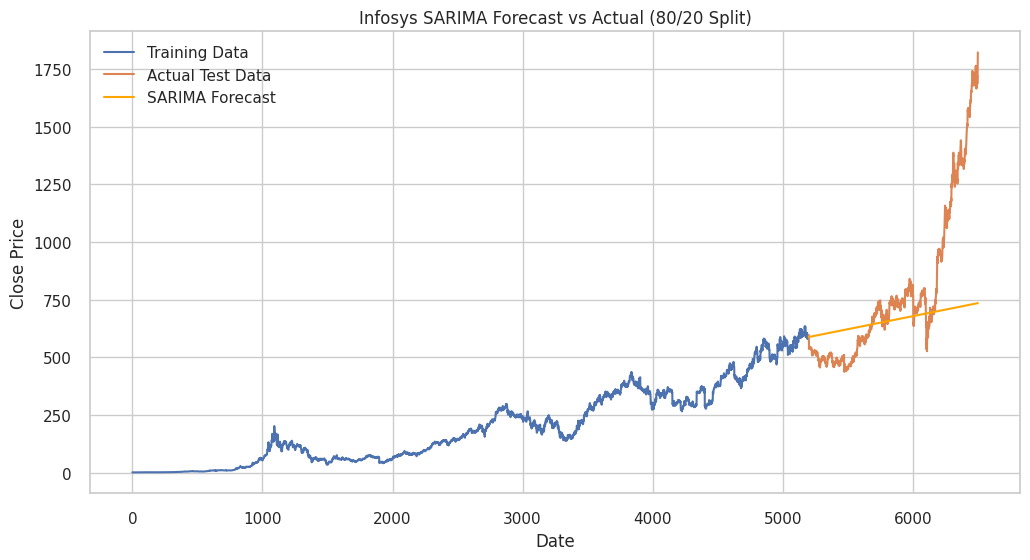

In [54]:
forecast_sarima = sarima_result.predict(start=len(train), end=len(df)-1, typ='levels')
sns.set(style="whitegrid")  # clean background

plt.figure(figsize=(12,6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data')
plt.plot(forecast_sarima, label='SARIMA Forecast', color='orange')
plt.title("Infosys SARIMA Forecast vs Actual (80/20 Split)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [58]:
import plotly.graph_objects as go



In [63]:
conf_int = sarima_result.get_forecast(steps=len(test)).conf_int()

fig.add_trace(go.Scatter(
    x=conf_int.index, y=conf_int.iloc[:,1],
    fill=None, mode='lines', line_color='lightgrey', showlegend=False
))
fig.add_trace(go.Scatter(
    x=conf_int.index, y=conf_int.iloc[:,0],
    fill='tonexty', mode='lines', line_color='lightgrey', name='95% CI'
))

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Training Data'))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Actual Test Data'))
fig.add_trace(go.Scatter(x=forecast_sarima.index, y=forecast_sarima, mode='lines',
                         name='SARIMA Forecast', line=dict(color='orange')))

fig.update_layout(
    title="Infosys SARIMA Forecast vs Actual (Interactive)",
    xaxis_title="Date",
    yaxis_title="Close Price",
    template="plotly_white"
)

fig.show()

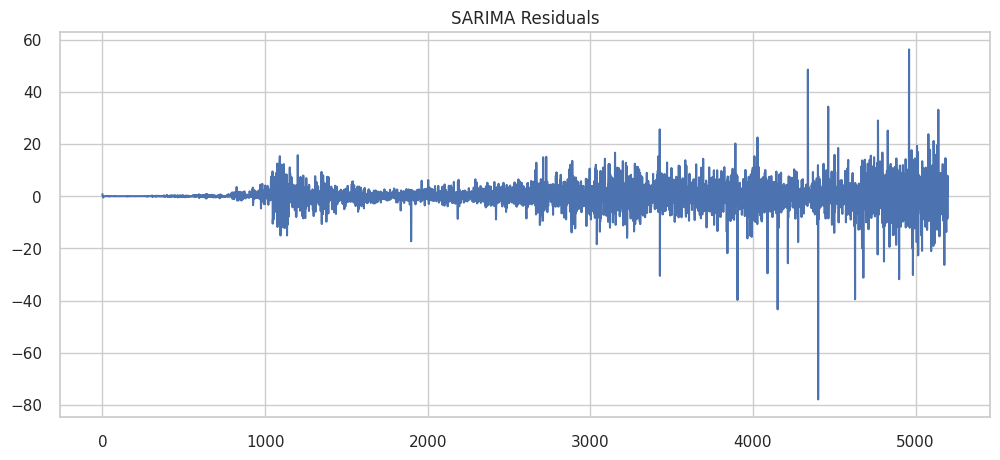

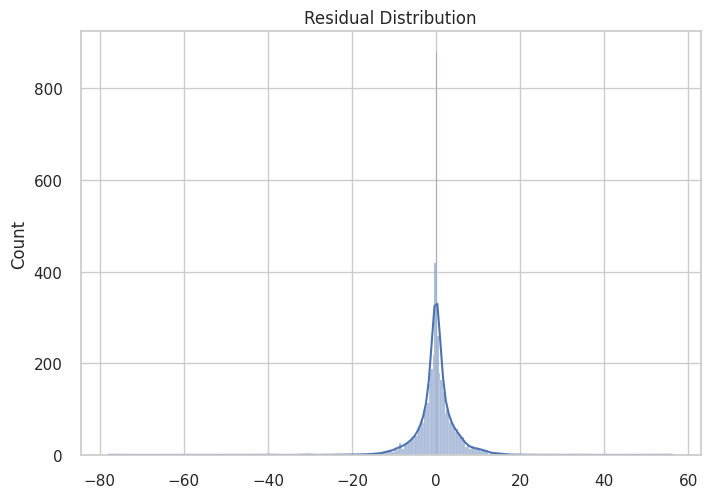

In [66]:
residuals = sarima_result.resid

plt.figure(figsize=(12,5))
plt.plot(residuals)
plt.title("SARIMA Residuals")
plt.show()

import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

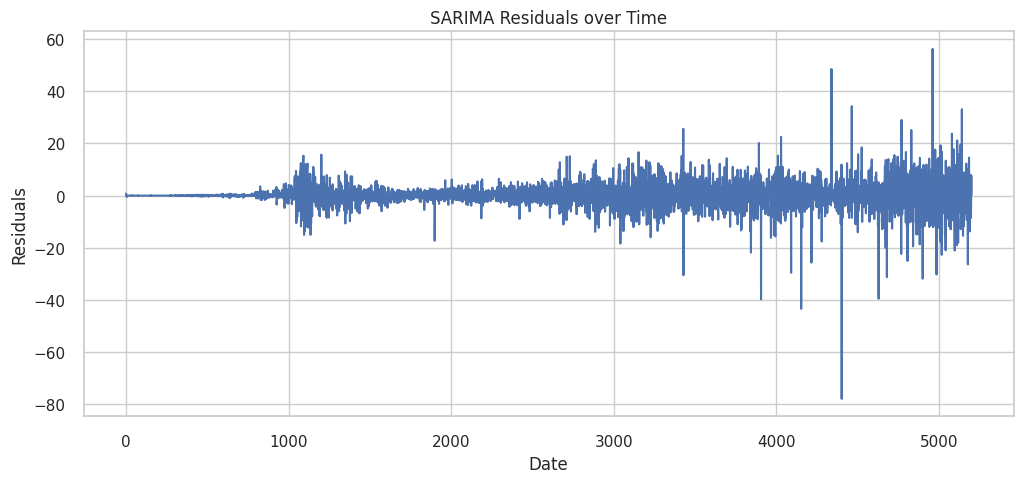

In [67]:
from statsmodels.graphics.tsaplots import plot_acf

# Get residuals
residuals = sarima_result.resid

# 1. Plot residuals over time
plt.figure(figsize=(12,5))
plt.plot(residuals)
plt.title("SARIMA Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

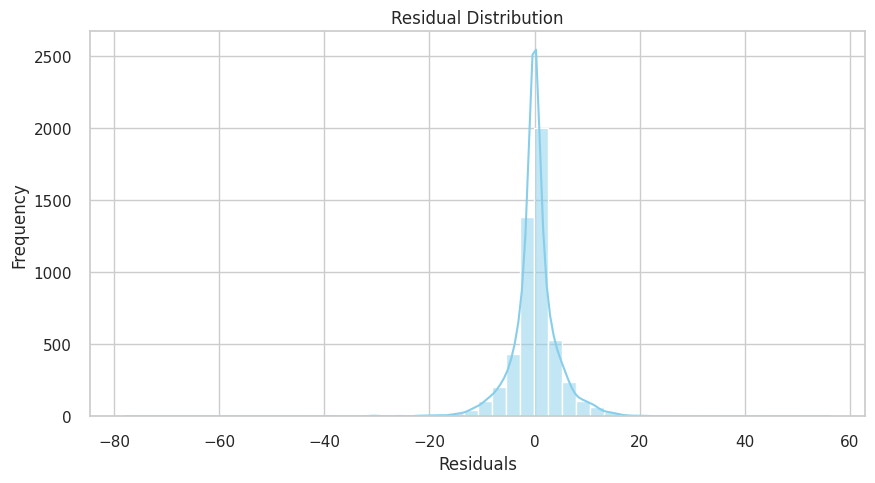

In [68]:
# 2. Histogram + KDE of residuals
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, bins=50, color='skyblue')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

<Figure size 1000x500 with 0 Axes>

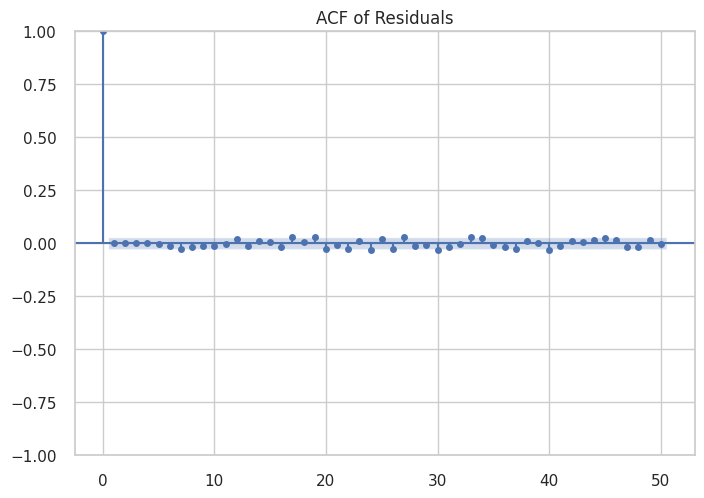

In [69]:
# 3. Autocorrelation of residuals
plt.figure(figsize=(10,5))
plot_acf(residuals, lags=50)
plt.title("ACF of Residuals")
plt.show()

In [70]:
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
print("RMSE on Test Data (SARIMA):", rmse_sarima)

RMSE on Test Data (SARIMA): 328.3375610988361


In [71]:
# Naive forecast: predict previous day's value
naive_forecast = test.shift(1).fillna(method='bfill')  # first value backfilled

In [72]:
# Moving average forecast using last 5 days
ma_forecast = train.rolling(window=5).mean().iloc[-len(test):]  # align with test set


In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE for naive model
rmse_naive = np.sqrt(mean_squared_error(test, naive_forecast))
print("RMSE Naive Forecast:", rmse_naive)

# RMSE for moving average model
rmse_ma = np.sqrt(mean_squared_error(test, ma_forecast))
print("RMSE Moving Average Forecast:", rmse_ma)


RMSE Naive Forecast: 13.79465340738958
RMSE Moving Average Forecast: 450.68566327684056


In [74]:
print("RMSE ARIMA:", rmse_arima)
print("RMSE SARIMA:", rmse_sarima)


RMSE ARIMA: 7.518206309206274
RMSE SARIMA: 328.3375610988361


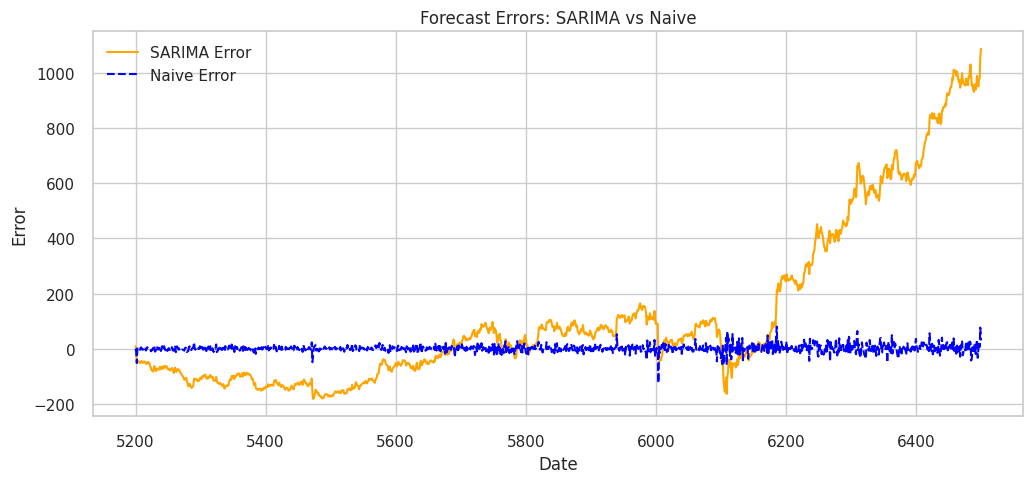

In [75]:
plt.figure(figsize=(12,5))
plt.plot(test - forecast_sarima, label='SARIMA Error', color='orange')
plt.plot(test - naive_forecast, label='Naive Error', color='blue', linestyle='--')
plt.title("Forecast Errors: SARIMA vs Naive")
plt.xlabel("Date")
plt.ylabel("Error")
plt.legend()
plt.show()

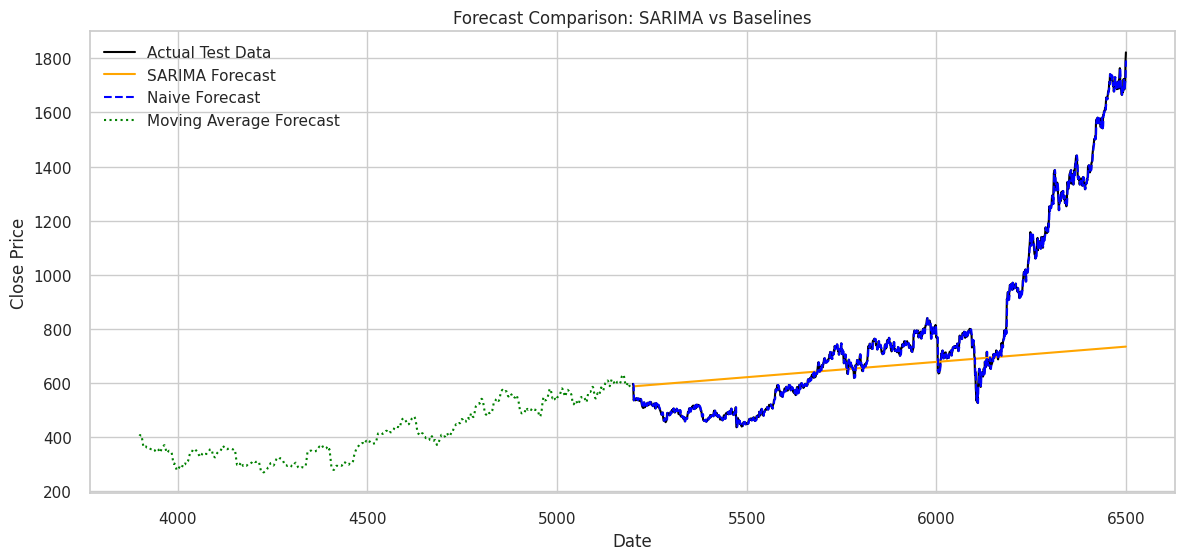

In [76]:
plt.figure(figsize=(14,6))
plt.plot(test, label='Actual Test Data', color='black')
plt.plot(forecast_sarima, label='SARIMA Forecast', color='orange')
plt.plot(naive_forecast, label='Naive Forecast', linestyle='--', color='blue')
plt.plot(ma_forecast, label='Moving Average Forecast', linestyle=':', color='green')
plt.title("Forecast Comparison: SARIMA vs Baselines")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [77]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ARIMA_Forecast,SARIMA_Forecast,ARIMA_Forecast_Optimized,Close_log,ARIMA_Log_Forecast,ARIMA_Log_Forecast_Original
0,1996-01-01,0.794921,0.796679,0.791015,0.796679,0.549483,204800.0,0.000000,0.000000,0.000000,-0.227303,0.000000,1.000000
1,1996-01-02,0.794921,0.798828,0.793457,0.793457,0.547260,204800.0,0.796679,0.796680,0.796679,-0.231356,-0.227303,0.796679
2,1996-01-03,0.798828,0.798828,0.798828,0.798828,0.550965,102400.0,0.793432,0.793457,0.793432,-0.224610,-0.231625,0.793243
3,1996-01-04,0.791015,0.794921,0.791015,0.793554,0.547327,307200.0,0.798936,0.798828,0.798936,-0.231234,-0.224081,0.799251
4,1996-01-05,0.784179,0.784179,0.784179,0.784179,0.540861,51200.0,0.793377,0.793554,0.793380,-0.243118,-0.231728,0.793162


In [78]:
    arima_forecast = arima_result.get_forecast(steps=len(test))
arima_pred = arima_forecast.predicted_mean
arima_conf = arima_forecast.conf_int()


In [79]:
sarima_forecast = sarima_result.get_forecast(steps=len(test))
sarima_pred = sarima_forecast.predicted_mean
sarima_conf = sarima_forecast.conf_int()

In [80]:
results_df = pd.DataFrame({
    'Actual': test.values,
    'ARIMA_Forecast': arima_pred.values,
    'ARIMA_Lower_CI': arima_conf.iloc[:,0].values,
    'ARIMA_Upper_CI': arima_conf.iloc[:,1].values,
    'SARIMA_Forecast': sarima_pred.values,
    'SARIMA_Lower_CI': sarima_conf.iloc[:,0].values,
    'SARIMA_Upper_CI': sarima_conf.iloc[:,1].values
}, index=test.index)

In [81]:
results_df.to_csv("forecast_results.csv", index=True)

print("✅ File saved as forecast_results.csv")

✅ File saved as forecast_results.csv
